# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [1]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [2]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [3]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from collections import Counter
# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556234.000,1571207.000,1556234.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556234.000
mean,1.673,1.501,2.958,1.057,164.499,162.395,1.253,12.607,1.107,0.492,2.191,0.332,0.298,18.553,2.297
std,0.470,1.142,70.591,0.816,65.730,69.951,0.486,11.701,1.260,0.073,2.690,1.751,0.035,14.300,0.706
min,1.000,0.000,-29.060,1.000,1.000,1.000,0.000,-250.000,-4.500,-0.500,-91.000,-40.000,-0.300,-252.800,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.820,2.500
max,6.000,9.000,68704.940,99.000,265.000,265.000,4.000,700.000,113.010,3.300,450.000,910.500,0.300,965.800,2.750


In [5]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1556234 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1556234 non-null  float64       
 6   store_and_fwd_flag     1556234 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [6]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556234.000,1571207.000,1556234.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556234.000
mean,1.673,1.501,2.958,1.057,164.499,162.395,1.253,12.607,1.107,0.492,2.191,0.332,0.298,18.553,2.297
std,0.470,1.142,70.591,0.816,65.730,69.951,0.486,11.701,1.260,0.073,2.690,1.751,0.035,14.300,0.706
min,1.000,0.000,-29.060,1.000,1.000,1.000,0.000,-250.000,-4.500,-0.500,-91.000,-40.000,-0.300,-252.800,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.820,2.500
max,6.000,9.000,68704.940,99.000,265.000,265.000,4.000,700.000,113.010,3.300,450.000,910.500,0.300,965.800,2.750


### Descripción de Columnas del Dataset.


In [7]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [8]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

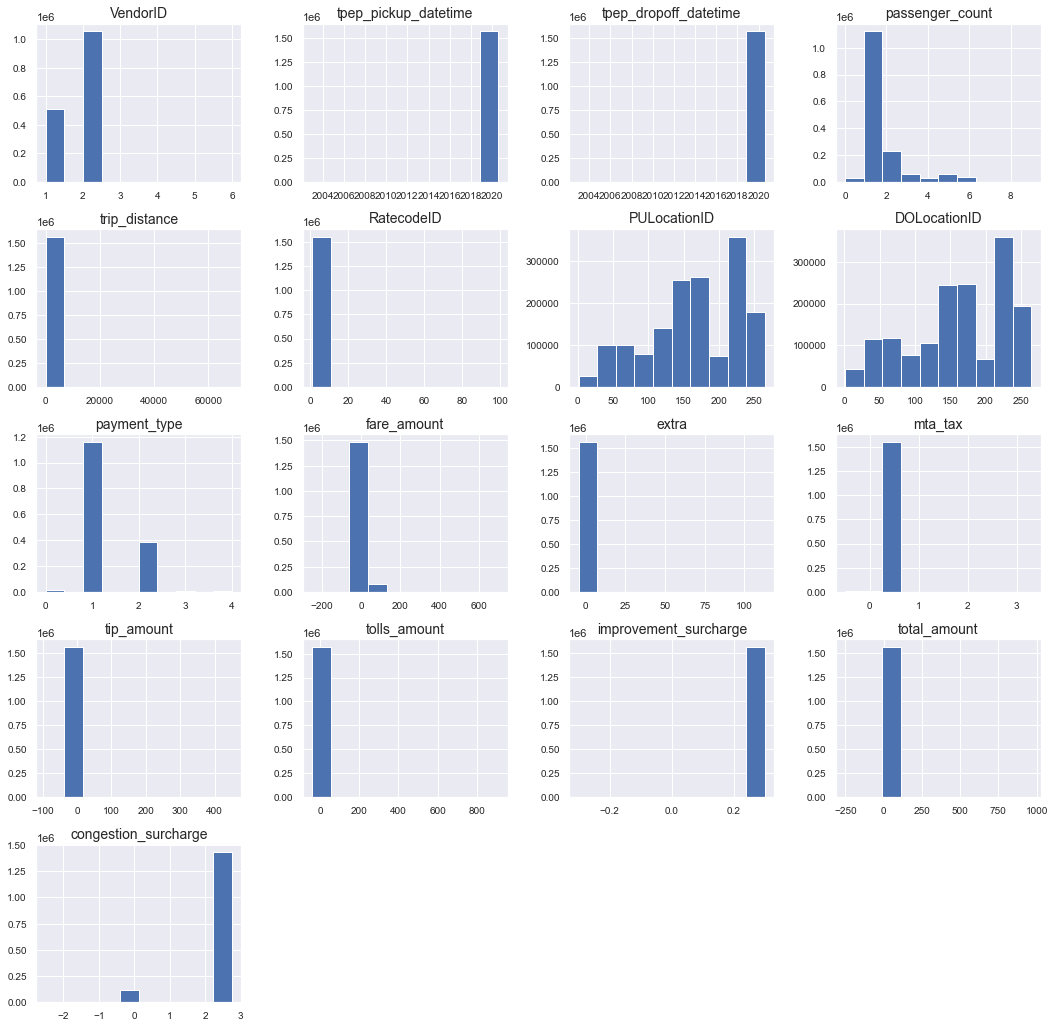

In [9]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [10]:
print_categorical(df.VendorID)

Ordinalidad: [1 2 6 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          4
6         45
1     514245
2    1056913
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [11]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [12]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [13]:
print_null_info(df.passenger_count)

Cantidad de nulos: 14973/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [14]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [15]:
print_categorical(df.PULocationID)

Ordinalidad: [263  90 138 186 246 229 230 161 179 236 116  79 157  43 237 100 166 114
 137 151 170 162  68 163 148  24 262 239 141 143 238 132   7  87 113  75
 107 142  48  40  33 244 140 256 233  88 234 231 125 158 144 164 264  97
  25  13 249 224 211  66 232  50 261 145 260 146 196  74 223  41 165 242
 149  70 168  80   4   1 209 133  42 129 205 193   9  45  76  65 215 218
  78  95 222  64  52 181  83  89  61 112 226 255  12  69 160  82  17  28
 136  49 265 228 119 152 185 124 225 108  37 254 241  14  72 135 134 216
  35  92 235 182 247  10 258 130 127  93  16  56 159 128  19 198  86  36
 213 202 192 200 177 257 243 150 190 167 169 188 139 175  85  39 171 194
 106  62 197  91   8  32  51 208 207  26  18 174 155 101  15  81 117 189
  23  47 195  53 219  71 123 191  34 126 102 227 147 210  55  38 153  21
  63 121 183  77 217 173 203 259 154 220 250 131 180 206 252  20 212  46
 248  11 118  96  54  22 120  67  29  60  94   3  73  59 178 214 201  98
 122 115 184  44 199  31 253  27  57 2


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [16]:
print_categorical(df.DOLocationID)

Ordinalidad: [ 74 107 230 142  68 237 162 236 146 262 234 224  50 161 166 148 129 186
 164 243 170 263   4 151 140  90 233  75 238 179  93  79 143 113 141 246
 100 138  87   7 244  24  21 229 137 249 116  48 144 255  22 181 261  33
  43 231  61 226 264 239  49 132 114  37  45 168 163 125 211 112 158  80
 202  88  95  13 232 265 256 189 152 223 257  41  82  25  67   1 260  42
  97 220 149 200 209  65  26  89 247 227  10 195 127 210 123  64  52  18
 124 188 139  70 167  76 193 196 106  17  92 159  71 225 134 120 173 171
  91 191  66 133 160  40 242 145  77 165 198  69 203 154  55 258 130 155
 101  54 212  36 185 150  39 228 157  12 241  98 119  51 136  81 213  38
  85  28  14 218 177 216 192 215 252 121 102  72 182  35   9  86 180  53
 235 208  78  56 128 197 219   3  94 169 254 117  16  34  19  29  62 217
 194 205 111  32 248 156 147  63 222 118 126  83  20 175 131 253  96 135
 206 207   6 250  47 108  59  15 190 178 183 172 174  57 214 122 259 115
 221  60 153  31 176  46 201  11  23 2


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [17]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  2.  5. nan  4.  3. 99.  6.]
Cantidad de nulos: 14973/1571207
Ocurrencias:
6.000          10
99.000         88
4.000        1209
3.000        3173
5.000        8585
2.000       35821
1.000     1507348
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [18]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 14973/1571207
Ocurrencias:
Y      15926
N    1540308
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [19]:
print_categorical(df.payment_type)

Ordinalidad: [2 1 3 0 4]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4582
3       8160
0      14973
2     382458
1    1161034
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [20]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [21]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [22]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [23]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [24]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [25]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [26]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [27]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 14973/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [28]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [29]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.describe() #TODO: Agrego describe para que se noten las cantidades eliminadas

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571100.000,1556234.000,1571100.000,1556234.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1571100.000,1556234.000
mean,1.673,1.501,2.958,1.057,164.501,162.398,1.253,12.606,1.107,0.492,2.191,0.332,0.298,18.551,2.297
std,0.470,1.142,70.593,0.816,65.729,69.950,0.486,11.700,1.260,0.073,2.690,1.751,0.035,14.299,0.706
min,1.000,0.000,-29.060,1.000,1.000,1.000,0.000,-250.000,-4.500,-0.500,-91.000,-40.000,-0.300,-252.800,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.800,2.500
max,6.000,9.000,68704.940,99.000,265.000,265.000,4.000,700.000,113.010,3.300,450.000,910.500,0.300,965.800,2.750


In [30]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571100
tpep_pickup_datetime: 0/1571100
tpep_dropoff_datetime: 0/1571100
passenger_count: 14866/1571100
trip_distance: 0/1571100
RatecodeID: 14866/1571100
store_and_fwd_flag: 14866/1571100
PULocationID: 0/1571100
DOLocationID: 0/1571100
payment_type: 0/1571100
fare_amount: 0/1571100
extra: 0/1571100
mta_tax: 0/1571100
tip_amount: 0/1571100
tolls_amount: 0/1571100
improvement_surcharge: 0/1571100
total_amount: 0/1571100
congestion_surcharge: 14866/1571100
airport_fee: 1571100/1571100


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [31]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1556234

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [32]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 1/1556234
fare_amount: 4983/1556234
extra: 2387/1556234
mta_tax: 4863/1556234
tip_amount: 48/1556234
tolls_amount: 112/1556234
improvement_surcharge: 4982/1556234
total_amount: 4983/1556234
congestion_surcharge: 3970/1556234


In [33]:
# Funcion para realizar subplots de variables

def plotVariables(dataframe, varArray):
    fig = plt.figure(figsize=(30,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for j,colName in enumerate(varArray):
        plt.subplot(3,3,j+1)
        plt.plot(dataframe[colName])
        plt.title(colName)
        

#### Exploración gráfica de variables con datos negativos

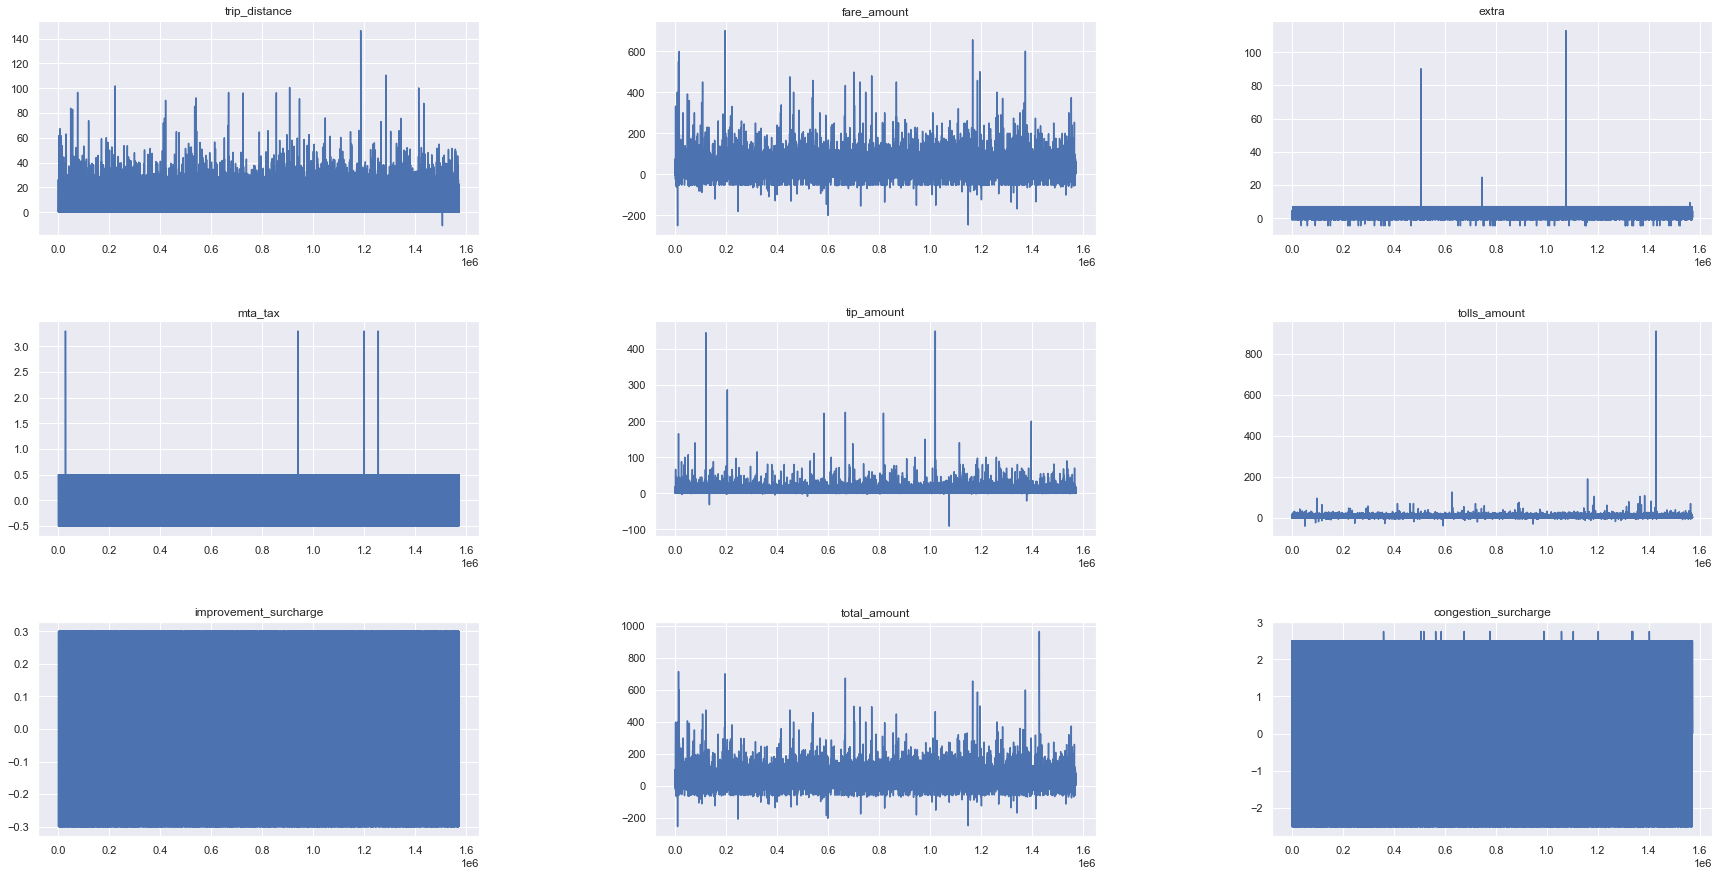

In [34]:
 #TODO: Agrego graficos para mostrar estos datos anomalos.
# Exploración gráfica de variables con datos negativos.

colArrays = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge']

plotVariables(df,colArrays)


In [35]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535759

#### Exploración gráfica de datos filtrados


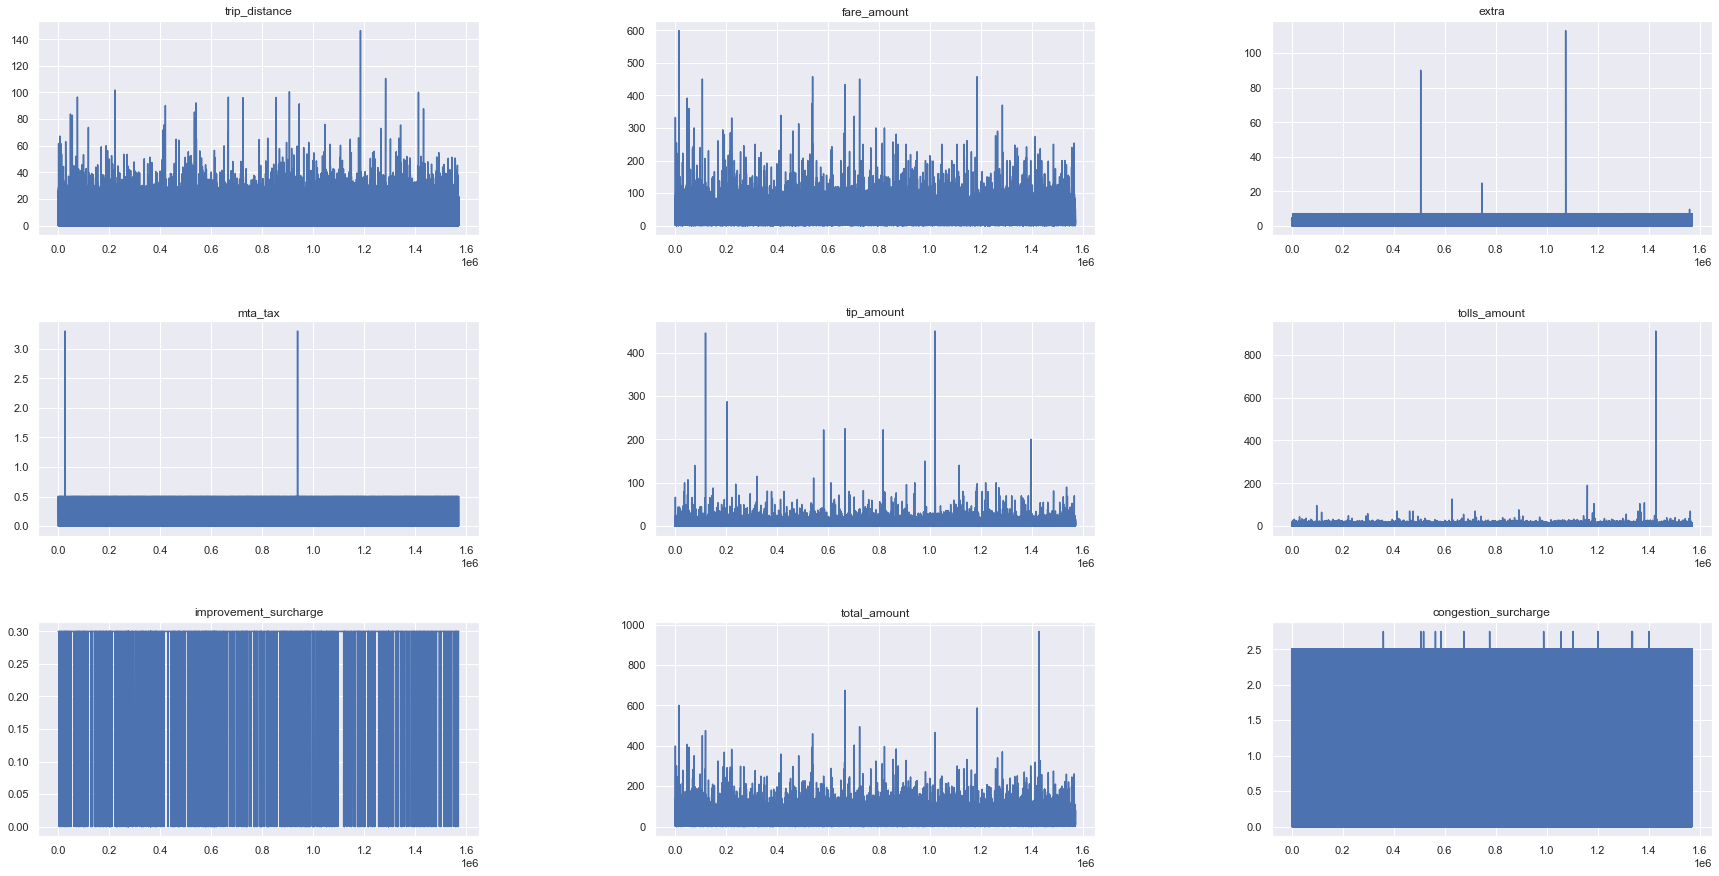

In [36]:
# Datos sin valores negativos
plotVariables(df,colArrays)

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [37]:
df = df[df["payment_type"] == 1]
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000
mean,1.670,1.494,2.866,1.040,166.146,164.046,1.000,12.451,1.132,0.498,2.949,0.341,0.300,19.271,2.380
std,0.470,1.140,3.677,0.307,65.217,69.302,0.000,10.883,1.259,0.031,2.655,1.601,0.003,13.977,0.535
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500
75%,2.000,2.000,2.910,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.350,2.500
max,2.000,9.000,146.400,99.000,265.000,265.000,1.000,457.500,113.010,3.300,450.000,190.000,0.300,674.310,2.750


### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [38]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [39]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [40]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 0


In [41]:
# Se eliminan las duraciones invalidas
df = df[(df['duration'] >= 0)]

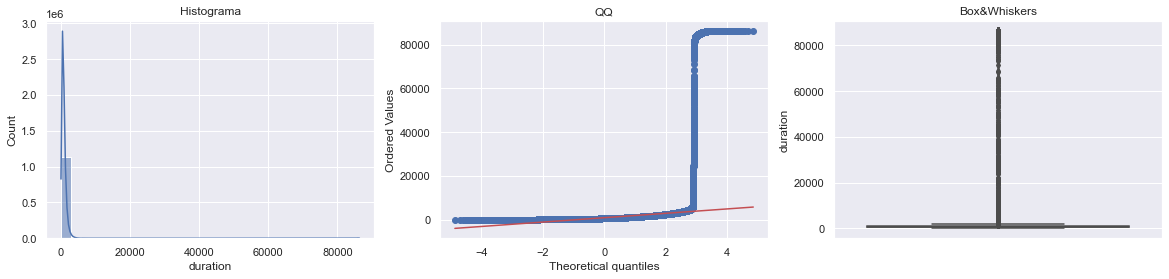

In [42]:
# Graficamos las nuevas columnas para observar su distribucion.
outlier_diagnostic_plots(df, 'duration')

#### Exploración gráfica de Morning, Afternoon, Evening

Text(0.5, 1.0, 'Evening')

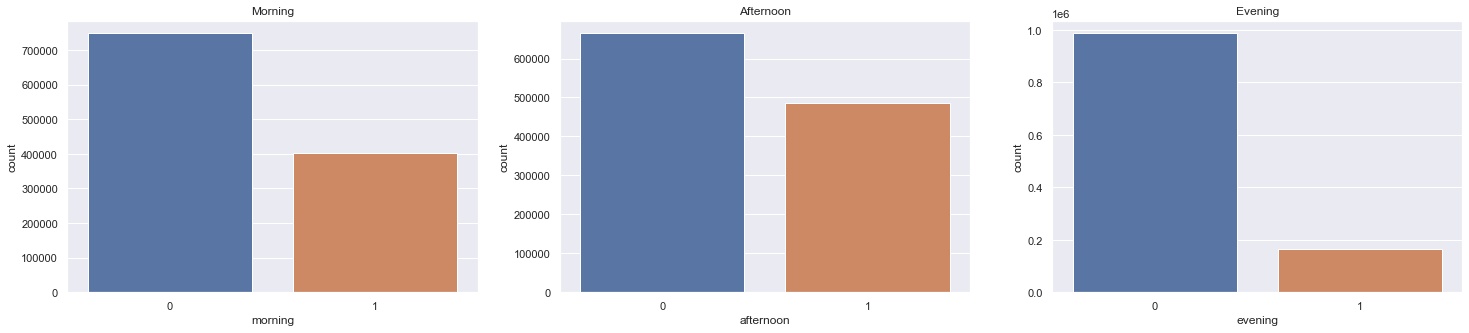

In [43]:
fig,axes = plt.subplots(1,3,figsize=(25,5))


sns.countplot(x='morning', data=df,ax=axes[0])
axes[0].set_title('Morning')

sns.countplot(x='afternoon', data=df,ax=axes[1])
axes[1].set_title('Afternoon')

sns.countplot(x='evening', data=df,ax=axes[2])
axes[2].set_title('Evening')


#### 2.2.2 Codificación del origen y destino

In [44]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
# location_id_min_th_count = 0.01
# total_items = len(df['PULocationID'])

# # convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
# pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
# df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# # # convertimos DOLocationID
# # dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
# # df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

# #pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
# def clear_location_low_values(x, th):
#   if x <= th:
#     return 0
#   return x

# df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# # df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# Contamos las apariciones de los lugares mas concurridos
mostPickUpSites = Counter(df['PULocationID'])

# Mostramos los 10 primeros.
print(mostPickUpSites.most_common(10))

aux = mostPickUpSites.most_common(10)
most_pickup_important_places = []
for i in aux:
    most_pickup_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['PULocationID'] = np.where(df['PULocationID'].isin(most_pickup_important_places), df['PULocationID'], 0)

sns.histplot(df['PULocationID'], bins=10, kde=True)
commonPickUpSites = Counter(df['PULocationID'])
# Mostramos los 10 primeros.
print(commonPickUpSites.most_common(20))


#### 2.2.3 Balance de la variable de salida

In [45]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


(1, 265)

In [46]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
# location_id_min_th_count = 0.01 * len(df)
# df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


[(236, 53974), (237, 47471), (161, 44481), (170, 37287), (162, 35531), (234, 32985), (142, 32758), (239, 32520), (141, 31831), (230, 30711)]
[(0, 771591), (236, 53974), (237, 47471), (161, 44481), (170, 37287), (162, 35531), (234, 32985), (142, 32758), (239, 32520), (141, 31831), (230, 30711)]


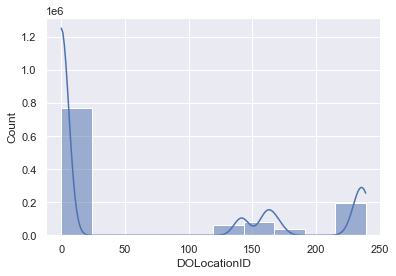

In [47]:


# Contamos las apariciones de los lugares mas concurridos
mostCommonSites = Counter(df['DOLocationID'])

# Mostramos los 10 primeros.
print(mostCommonSites.most_common(10))

aux = mostCommonSites.most_common(10)
most_important_places = []
for i in aux:
    most_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['DOLocationID'] = np.where(df['DOLocationID'].isin(most_important_places), df['DOLocationID'], 0)

sns.histplot(df['DOLocationID'], bins=10, kde=True)
commonSites = Counter(df['DOLocationID'])
# Mostramos los 10 primeros.
print(commonSites.most_common(20))

In [48]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,PULocationIDFreq
count,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000,1151140.000
mean,1.670,1.494,2.866,1.040,166.146,65.100,1.000,12.451,1.132,0.498,2.949,0.341,0.300,19.271,2.380,946.708,0.024
std,0.470,1.140,3.677,0.307,65.217,95.682,0.000,10.883,1.259,0.031,2.655,1.601,0.003,13.977,0.535,3536.126,0.013
min,1.000,0.000,0.010,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,0.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500,399.000,0.017
50%,2.000,1.000,1.650,1.000,162.000,0.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500,645.000,0.024
75%,2.000,2.000,2.910,1.000,234.000,161.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.350,2.500,1021.000,0.033
max,2.000,9.000,146.400,99.000,265.000,239.000,1.000,457.500,113.010,3.300,450.000,190.000,0.300,674.310,2.750,86381.000,0.045


### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [ ]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationIDFreq',
  'morning', 'afternoon', 'evening']
target_col = ['DOLocationID']

X = df[feature_cols]
y = df[target_col]

#### Eliminacion de datos con baja varianza

In [ ]:
# TODO
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X)
print(X.shape)
print(data_constant.shape)

In [ ]:
X.describe()

In [ ]:
data_constant.dtype

In [ ]:
y.shape

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [ ]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


In [ ]:
#imprimo tamaños de los dataset de train y test
print(f'train len={len(X_train)}')
print(f'test len={len(X_test)}')

### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [ ]:
rf.fit(X_train, y_train.values.reshape(-1))


In [ ]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_rf_pred))
print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

### 3.3 Regresión logística

In [ ]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [ ]:
#logistic_regression_report(X_train, X_test, y_train, y_test)
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(random_state = 1)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

lr_precision, lr_recall, lr_threshold

In [ ]:
lr_precision

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl